#**✉✉✉Case Study on application of neural networks— “Classification of Emails”✉✉✉**


This case study is built to classify a given mail as spam (not good) or ham (good) email. This will help you not read any unnecessary emails.
The email will be classified based on its content.


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
import io

#Read the data
Email_Data = pd.read_csv(io.StringIO(uploaded['spam.csv'].decode(encoding = "ISO-8859-1")))

**What is spam email?**
--

Spam email is unsolicited and unwanted junk email sent out in bulk to an indiscriminate recipient list. Typically, spam is sent for commercial purposes. It can be sent in massive volume by botnets, networks of infected computers. Spam email is unsolicited and unwanted junk email sent out in bulk to an indiscriminate recipient list. Typically, spam is sent for commercial purposes. It can be sent in massive volume by botnets, networks of infected computers.


**What is the purpose of spam email?**
--

The main idea of spam is to make a profit. Mass email sending is cheap and easy compared to physical mail. Near 250 billion emails are sent globally every day, and 45% of them are spam. Even though the conversion rate is shallow — one reply in 12,500,00 spam emails sent, according to TechRadar — it is still worth a spammer's while.
In most cases, spammers disguise unwanted emails with the mask of promotions offering something from the “ultimate diet drug” to “100% working remedy for men’s health”. Aside from commercials, the most popular types of spam include adult content and emails promising financial independence by following simple instructions.
According to the Register of Known Spam Operations (ROKSO), most of the world’s spam activity comes from about a hundred of so-called “spam gangs” operating mainly from the USA, Russia, and China.


**Why do we get spam emails?**	
--

1.	Your email address was exposed during a data leakage
2.	Your email was harvested by a specialized tool
3.	Your email was stolen from someone’s contact list
4.	Your email was randomly generated
5.	A dishonest company sold your email



In [ ]:
Email_Data.shape

In [ ]:
Email_Data = Email_Data[['v1', 'v2']]
Email_Data = Email_Data.rename(columns={"v1":"Target","v2":"Email"})
Email_Data.head()

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
from nltk import *
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Remove stop words
stop = stopwords.words('english')
Email_Data['Email'] = Email_Data['Email'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# check a small sample of pre-processed data
Email_Data.head()

In [ ]:
# Delete punctuations and convert text to lower case
Email_Data['Email'] = Email_Data['Email'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))
#Email_Data['Email'] = Email_Data['Email'].apply(lambda x: re.sub('  ', '', x))
Email_Data['Email'].head(5)

In [ ]:
# giving column heading
To_Process=Email_Data[['Email', 'Target']]
print(To_Process.head())

In [ ]:
# Data preparation for model building 
# Now we prepare the data

# Train and test split with 80:20 ratio
train, test = train_test_split(To_Process, test_size=0.2)

# Define the sequence lengths, max number of words and embedding dimensions

# Sequence length of each word. If more, truncate. If less, pad with zeros
MAX_SEQUENCE_LENGTH = 300

# Top 6000 frequently occurring words
MAX_NB_WORDS = 6000


%tensorflow_version 1.x magic
# Get the frequently occurring words
#! pip install keras
import keras
from keras.preprocessing.text import Tokenizer
tokenizer = keras.preprocessing.text.Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(train.Email)
train_sequences = tokenizer.texts_to_sequences(train.Email)
test_sequences = tokenizer.texts_to_sequences(test.Email)

# dictionary containing words and their index
word_index = tokenizer.word_index

print(word_index)
# total words in the corpus
print('Found %s unique tokens.' % len(word_index))

from keras.preprocessing.sequence import pad_sequences

# make each sequence to 300
train_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

print(train_data.shape)
print(test_data.shape)

# Use of pad_sequences
#https://stackoverflow.com/questions/42943291/what-does-keras-io-preprocessing-sequence-pad-sequences-do/42964543

In [ ]:
train_labels = train['Target']
test_labels = test['Target']

#import library
from sklearn.preprocessing import LabelEncoder
import numpy as np

# converts the character array to numeric array. Assigns levels to unique labels.
le = LabelEncoder()
le.fit(train_labels)
train_labels = le.transform(train_labels)
test_labels = le.transform(test_labels)
print(le.classes_)
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

In [ ]:
# changing data types
# to_categorical is defined under 
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
# to_categorical is used to convert array of labeled data(from 0 to nb_classes-1) to one-hot vector.

from keras.utils import to_categorical
labels_train = to_categorical(np.asarray(train_labels))
labels_test = to_categorical(np.asarray(test_labels))
print('Shape of data tensor:', train_data.shape)
print('Shape of label tensor:', labels_train.shape)
print('Shape of test-label tensor:', labels_test.shape)

# sampling some o/p to see
print(train_labels[:5])   # here we see a single list of 1's and 0's. Where 1 means spam and 0 means ham 
print(labels_train[:5])   # here you would see One hot encoded o/p.  i.e 2 columns ham spam
                          #                                                         0    1   -> means mail is spam
                          #                                                         1    0   -> means mail is ham

In [ ]:
EMBEDDING_DIM = 100
#print(MAX_SEQUENCE_LENGTH)

**Recurrent Neural Network:**
--

The fundamental feature of a Recurrent Neural Network (RNN) is that the network contains at least one feed-back connection, so the activations can flow round in a loop. That enables the networks to do temporal processing and learn sequences, e.g., perform sequence recognition/reproduction or temporal association/prediction. Recurrent neural network architectures can have many different forms. One common type consists of a standard Multi-Layer Perceptron (MLP) plus added loops. These can exploit the powerful non-linear mapping capabilities of the MLP, and also have some form of memory. Others have more uniform structures, potentially with every neuron connected to all the others, and may also have stochastic activation functions. For simple architectures and deterministic activation functions, learning can be achieved using similar gradient descent procedures to those leading to the back-propagation algorithm for feed-forward networks.
 
In sequential tasks such as natural language and speech processing, there is always dependence of present input data upon the previous applied inputs. Task of RNNs is to find the relationship between current input and the previous applied inputs. In theory RNNs can make use of information sequence of any arbitrarily length, but in practice they are limited to looking back only a few steps.



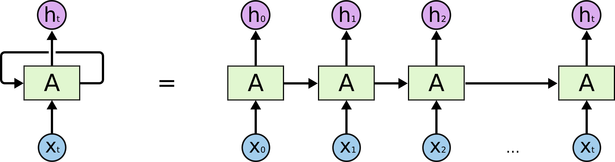

The above figure shows a RNN being unfolded into a full network. By unfolding we simply mean that we are repeating the same layer structure of network for the complete sequence.
Xt is the input at time step t. Xt is a vector of any size N.
A is the hidden state at time step t. It’s the “memory” of the network. It is calculated based on the previous hidden state and the input at the current step.
Represented by At= f (W Xt +U At-1)
Here W and U are weights for input and previous state value input. And f is the non-linearity applied to the sum to generate final cell state.

One of the appeals of RNNs is the idea that they might be able to connect previous information to the present task, such as using previous video frames might inform the understanding of the present frame. If RNNs could do this, they’d be extremely useful. Sometimes, we only need to look at recent information to perform the present task. For example, consider a language model trying to predict the next word based on the previous ones. If we are trying to predict the last word in “the clouds are in the sky,” we don’t need any further context – it’s pretty obvious the next word is going to be sky. In such cases, where the gap between the relevant information and the place that it’s needed is small, RNNs can learn to use the past information. In theory, RNNs are absolutely capable of handling such “long-term dependencies.” A human could carefully pick parameters for them to solve toy problems of this form. Sadly, in practice, RNNs don’t seem to be able to learn them.


In [ ]:
#import library
from keras.layers.recurrent import SimpleRNN
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.layers import  Flatten, BatchNormalization
from keras.layers import MaxPooling1D
from keras.models import Model
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
#model training
print('Training SIMPLERNN model.')
model = Sequential()
model.add(Embedding(MAX_NB_WORDS,EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH))

## https://keras.io/api/layers/recurrent_layers/simple_rnn/
model.add(SimpleRNN(2, input_shape=(None,1)))
model.add(Dense(2,activation='softmax'))

model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

model.fit(train_data, labels_train, batch_size=16, epochs=5, validation_data=(test_data, labels_test))


In [ ]:
# prediction on test data
predicted_Srnn=model.predict(test_data)
predicted_Srnn

In [ ]:
#model evaluation
from sklearn.metrics import precision_recall_fscore_support as score
import sklearn
precision, recall, fscore, support = score(labels_test,predicted_Srnn.round())

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print("############################")
print(sklearn.metrics.classification_report(labels_test, predicted_Srnn.round()))

**Conclusion:**
So we have implemented email classification using simple RNN. After that we have tried to increase its accuracy.
